In [567]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [568]:
df_train=pd.read_csv('train (1).csv')

In [569]:
# # exploratory data analysis(EDA)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [570]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [571]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [572]:
# observation
# ----------------------------------------------
# 891 instance in data (rows)
# 5 object Name, Sex, Ticket, Cabin, Embarked
# 2 numerical variables,Age and Fare
# 6 categorigal Embarked ,Pclass , Sex, Parch , SibSp ,Survived
# Age 714 non-null and 177 null
# Cabin 204 non-null and 687 null
# Embarked 889 non-null and 2 null

In [573]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [574]:
# Fare alot of outliers 
# age little outliers

In [575]:
# to_numpy put val in array
def data_info(data):
    cols= data.columns
    uniques_val= [data[col].value_counts().head(10).index.to_numpy() for col in cols]
    n_uniques = [data[col].nunique() for col in cols ]
    dtype= [data[col].dtype for col in cols ]
    nulls = [data[col].isna().sum() for col in cols]
    dup = [data.duplicated().sum() for col in cols]
    return pd.DataFrame({'col': cols , 'nulls':nulls , 'dtype':dtype ,'uniques_val' :uniques_val,'n_uniques':n_uniques,'duplicated':dup})        

In [576]:
data_info(df_train)

,col,nulls,dtype,uniques_val,n_uniques,duplicated
0,PassengerId,0,int64,"[1, 599, 588, 589, 590, 591, 592, 593, 594, 595]",891,0
1,Survived,0,int64,"[0, 1]",2,0
2,Pclass,0,int64,"[3, 1, 2]",3,0
3,Name,0,object,"[Braund, Mr. Owen Harris, Boulos, Mr. Hanna, F...",891,0
4,Sex,0,object,"[male, female]",2,0
5,Age,177,float64,"[24.0, 22.0, 18.0, 19.0, 28.0, 30.0, 21.0, 25....",88,0
6,SibSp,0,int64,"[0, 1, 2, 4, 3, 8, 5]",7,0
7,Parch,0,int64,"[0, 1, 2, 5, 3, 4, 6]",7,0
8,Ticket,0,object,"[347082, CA. 2343, 1601, 3101295, CA 2144, 347...",681,0
9,Fare,0,float64,"[8.05, 13.0, 7.8958, 7.75, 26.0, 10.5, 7.925, ...",248,0


In [577]:
# calc nulls and convert to persentage
# round بتقرب الاقرب علامه
nulpct = (df_train.isnull().sum() / len(df_train))*100
print(' Null Values (% of entries):')
print(round(nulpct.sort_values(ascending=False),2))

 Null Values (% of entries):
Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64


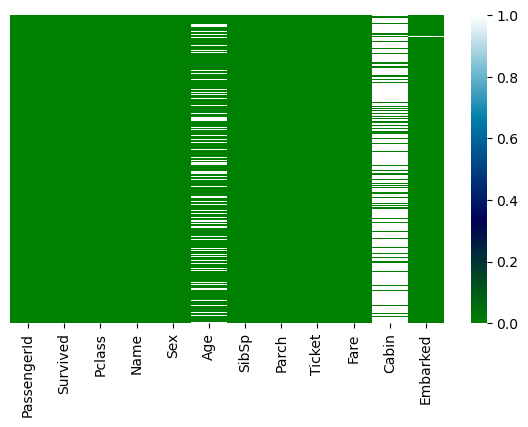

In [578]:
plt.figure(figsize = (7,4))
sns.heatmap(df_train.isnull(), yticklabels=False, cmap='ocean');

In [579]:
# categorical_features
# know which column is categorical
def categorical_plot(data, columns,numbers_of_cat_value):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize=(20, 5 * total_rows))
    plot_idx = 1
    for column in columns:
        if data[column].nunique() <= numbers_of_cat_value:
            plt.subplot(total_rows, total_cols, plot_idx)
            sns.countplot(x=data[column], palette="rocket", hue=data[column])
            plt.title(f"Count Plot of {column}")
            plot_idx += 1
        else:
            print(f"Column '{column}' is not categorical.")
    plt.tight_layout()
    plt.show()

Column 'PassengerId' is not categorical.
Column 'Name' is not categorical.
Column 'Age' is not categorical.
Column 'Ticket' is not categorical.
Column 'Fare' is not categorical.
Column 'Cabin' is not categorical.


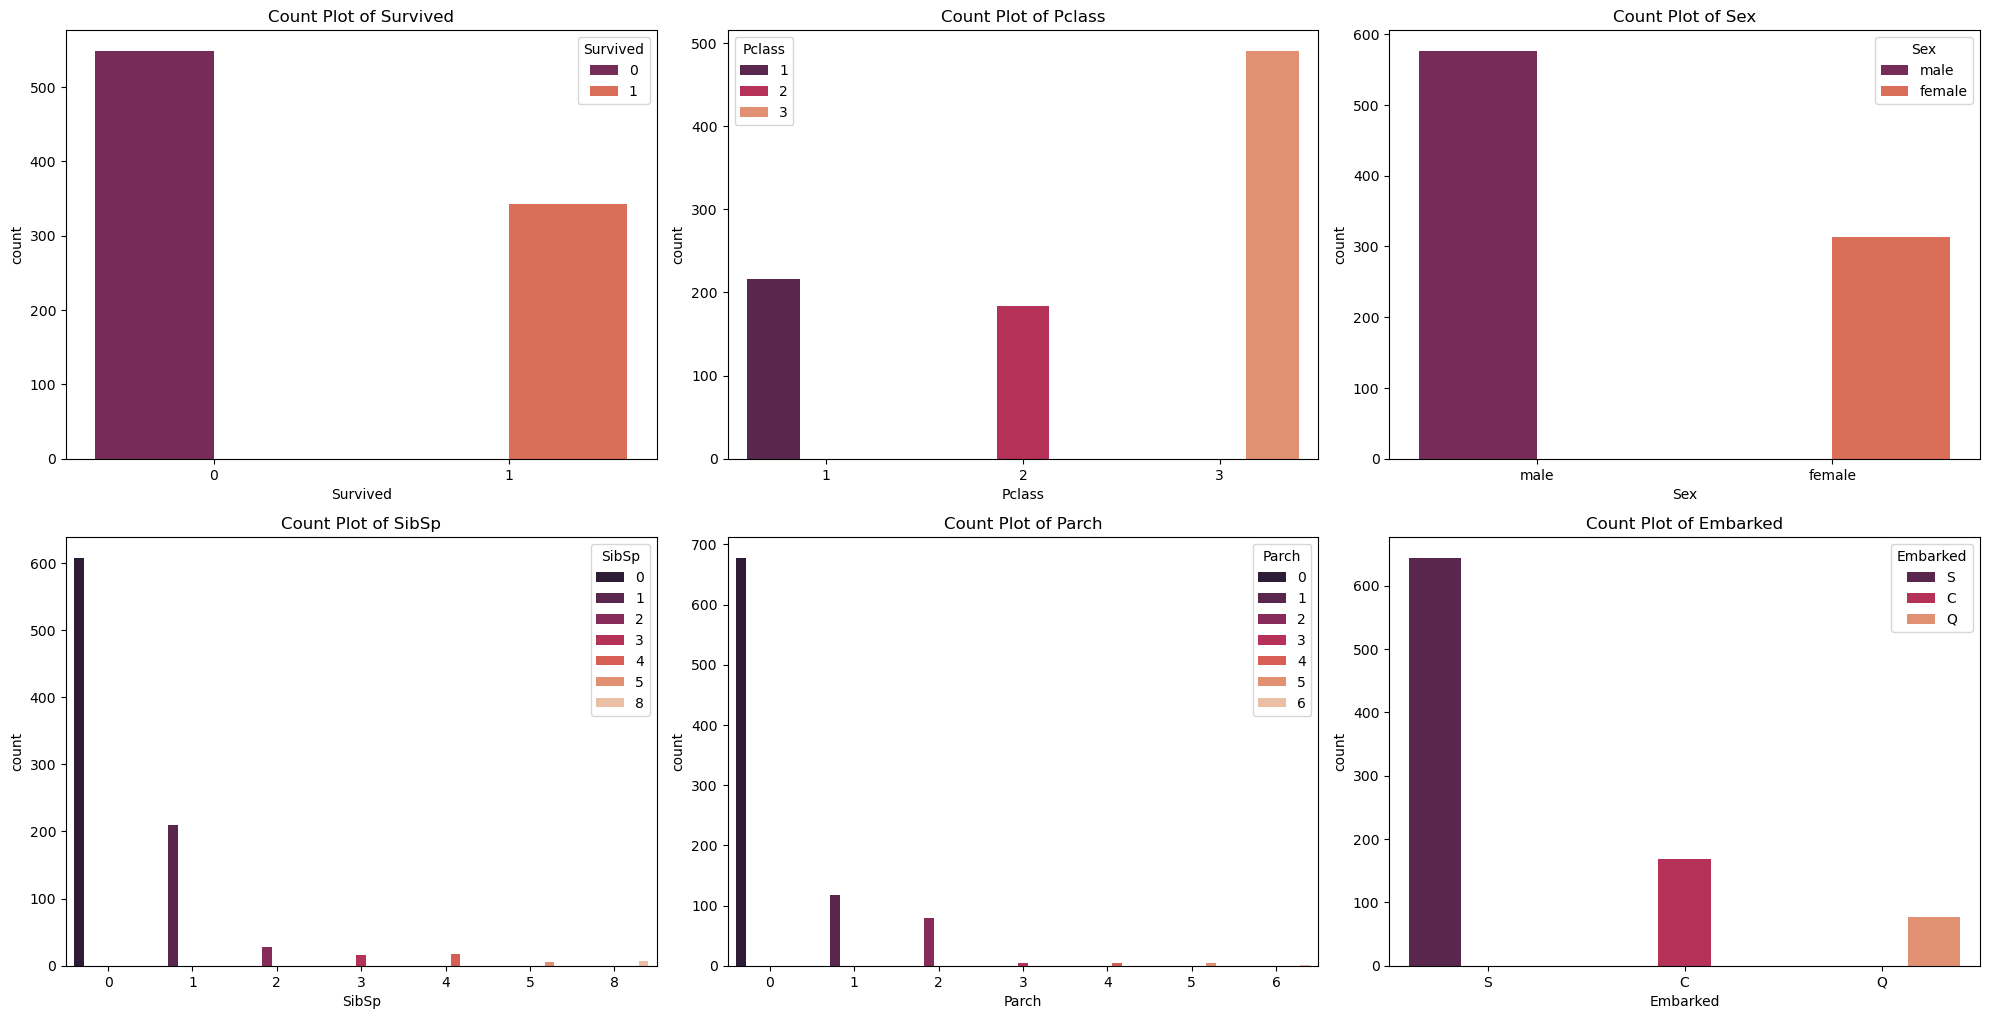

In [580]:
categorical_plot(df_train, df_train.columns,7)

In [581]:
Continuous_Features=["Age","Fare"]

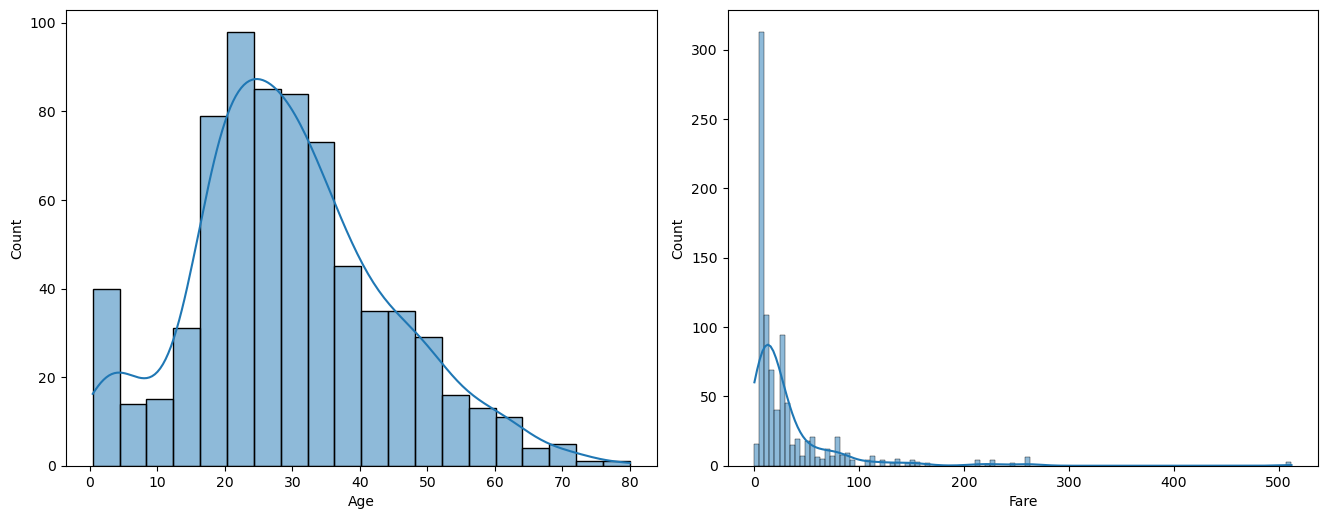

In [582]:
# continuous features
plt.figure(figsize=(20, 10),)
for i in range(len(Continuous_Features)):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_train[Continuous_Features[i]],kde=True)
plt.tight_layout()
plt.show()

In [583]:
#(data[column].value_counts().iloc[0]>=numbers_of_cat_value) =======> to any columns num unique(PassengerId)
def continuous_plot(data, columns,numbers_of_cat_value):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize=(20, 5 * total_rows))
    plot_idx = 1
    for column in columns:
        if (data[column].nunique()) > numbers_of_cat_value and (data[column].dtype != 'object') and (data[column].value_counts().iloc[0]>=numbers_of_cat_value):
            plt.subplot(total_rows, total_cols, plot_idx)
            sns.histplot(data[column])
            plt.title(f"histograme plot of {column}")
            plot_idx += 1
        else:
            print(f"Column '{column}' is not countinuous.")
    plt.tight_layout()
    plt.show()


Column 'PassengerId' is not countinuous.
Column 'Survived' is not countinuous.
Column 'Pclass' is not countinuous.
Column 'Name' is not countinuous.
Column 'Sex' is not countinuous.
Column 'SibSp' is not countinuous.
Column 'Parch' is not countinuous.
Column 'Ticket' is not countinuous.
Column 'Cabin' is not countinuous.
Column 'Embarked' is not countinuous.


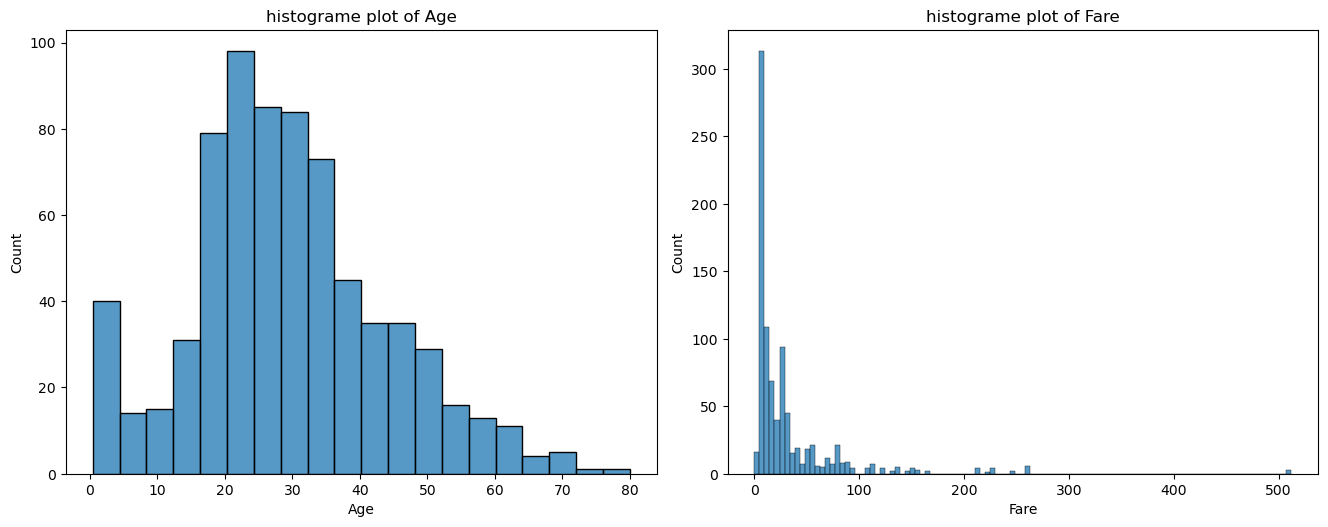

In [584]:
continuous_plot(df_train, df_train.columns,10)

In [585]:
def categorical_plot_wrt_Traget(data, columns,target,numbers_of_cat_value):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize=(20, 5 * total_rows))
    plot_idx = 1
    for column in columns:
        if data[column].nunique() < numbers_of_cat_value:
            plt.subplot(total_rows, total_cols, plot_idx)
            sns.countplot(x=data[column], palette="rocket", hue=data[target])
            plt.title(f"Count Plot of {column} wrt Survived ")
            plot_idx += 1
        else:
            print(f"Column '{column}' is not categorical.")
    plt.tight_layout()
    plt.show()

Column 'PassengerId' is not categorical.
Column 'Name' is not categorical.
Column 'Age' is not categorical.
Column 'Ticket' is not categorical.
Column 'Fare' is not categorical.
Column 'Cabin' is not categorical.


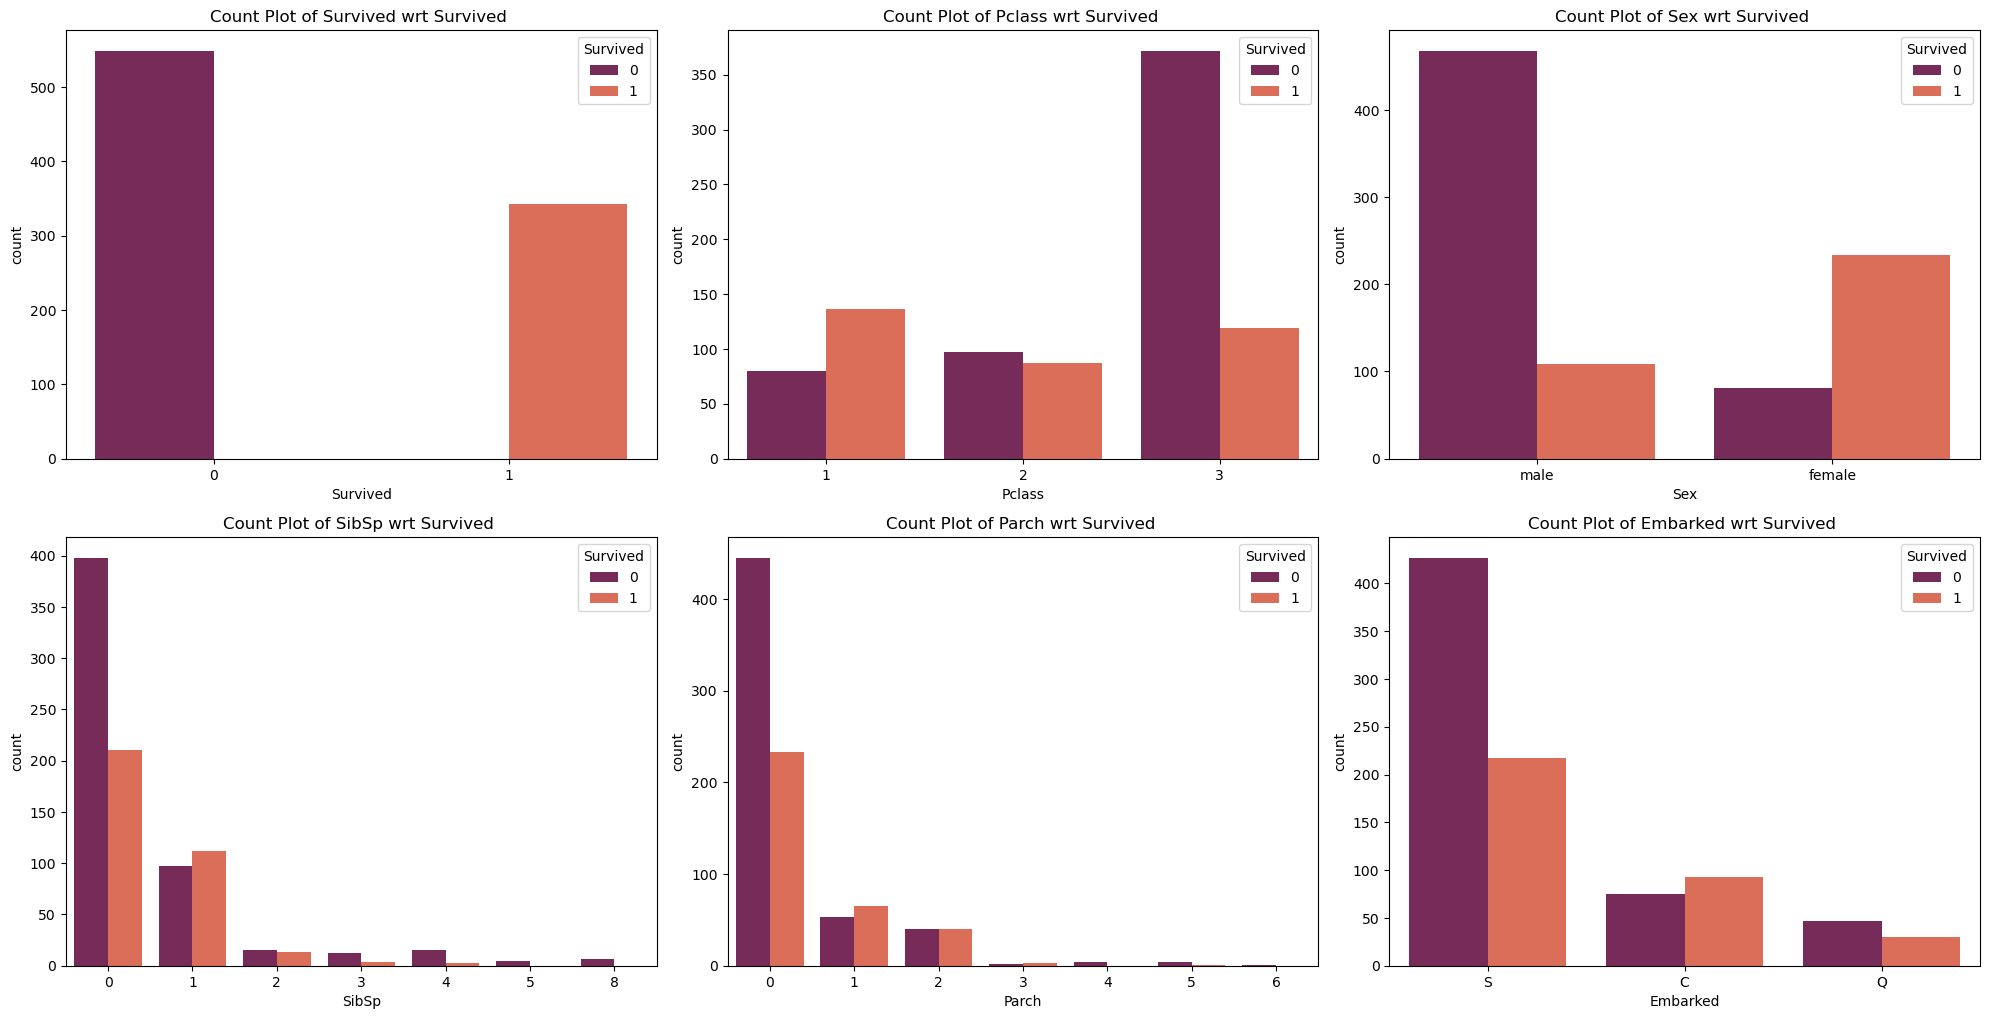

In [586]:
categorical_plot_wrt_Traget(df_train,df_train.columns,"Survived",10)

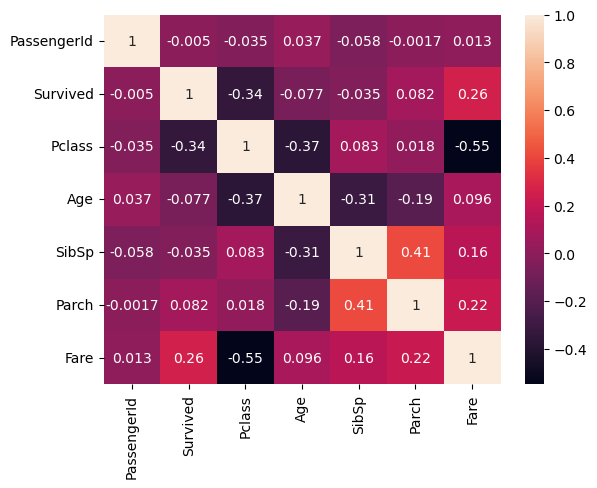

In [587]:
#correlation
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap="rocket" );

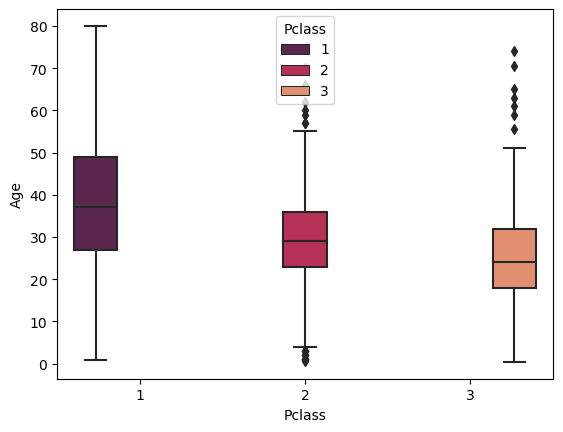

In [588]:
# used to know outliers and compare diffirent categories 
sns.boxplot(x = "Pclass", y= "Age", palette = "rocket", data = df_train,hue="Pclass");

In [589]:
# Detect the outlier
# enumerate ===> name and index of columns
# note ===> outlies for numeric_columns only ( age and fare )
def boxplot_numeric_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number'])
    num_cols = len(numeric_columns.columns)
    plt.figure(figsize=(25, 5))
    for i, column in enumerate(numeric_columns.columns):
        plt.subplot(1, num_cols, i+1)
        sns.boxplot(x=numeric_columns[column])
        plt.title(f'Box plot for {column}')

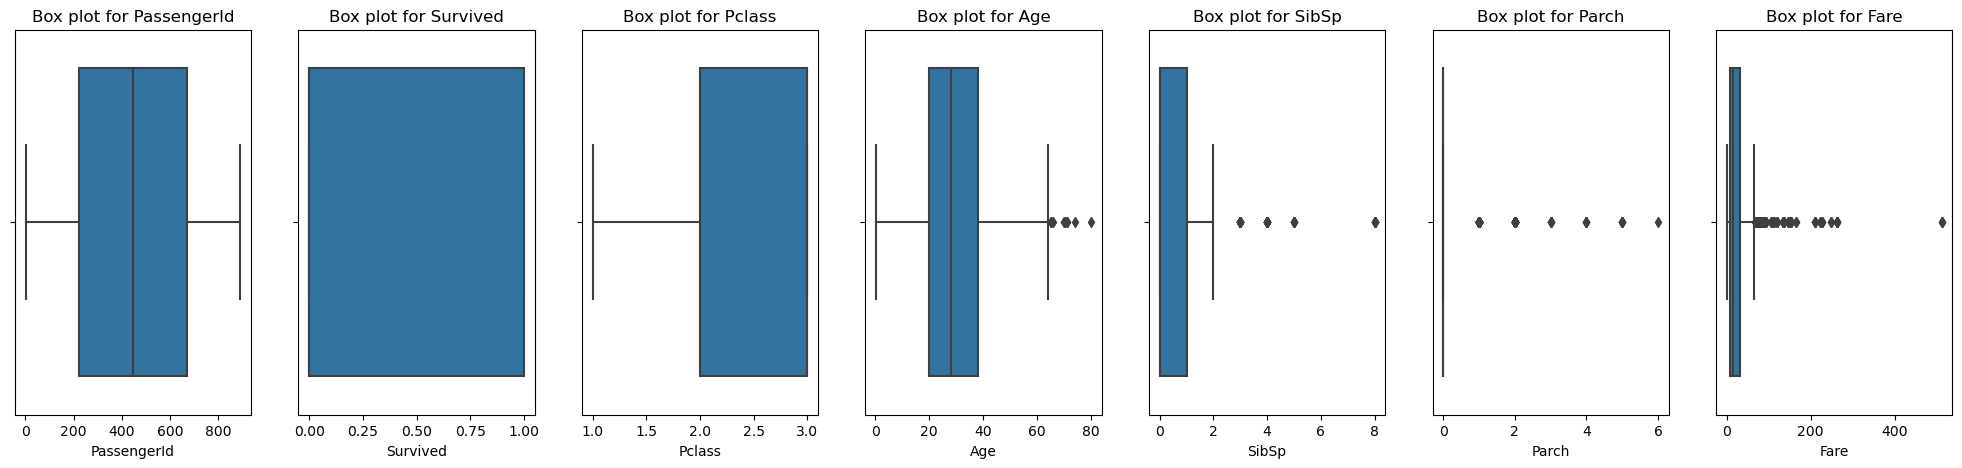

In [590]:
boxplot_numeric_columns(df_train)

In [591]:
# Data Preprocessing and Cleaning

In [592]:
train_data_groupby = df_train.groupby('Cabin')

In [593]:
for i,n in train_data_groupby:
  print(i)
  print(n)

A10
     PassengerId  Survived  Pclass                 Name   Sex   Age  SibSp  \
583          584         0       1  Ross, Mr. John Hugo  male  36.0      0   

     Parch Ticket    Fare Cabin Embarked  
583      0  13049  40.125   A10        C  
A14
     PassengerId  Survived  Pclass                         Name   Sex  Age  \
475          476         0       1  Clifford, Mr. George Quincy  male  NaN   

     SibSp  Parch  Ticket  Fare Cabin Embarked  
475      0      0  110465  52.0   A14        S  
A16
     PassengerId  Survived  Pclass  \
556          557         1       1   

                                                  Name     Sex   Age  SibSp  \
556  Duff Gordon, Lady. (Lucille Christiana Sutherl...  female  48.0      1   

     Parch Ticket  Fare Cabin Embarked  
556      0  11755  39.6   A16        C  
A19
     PassengerId  Survived  Pclass                        Name   Sex  Age  \
284          285         0       1  Smith, Mr. Richard William  male  NaN   

     SibSp  P

In [594]:
df_train.drop('Cabin', axis=1 , inplace=True)

In [595]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [596]:
# median for dataframe at Pclass 1,2,3 
# df_train['Pclass']==1 ====> values and true , false 
# df_train[df_train['Pclass']==1] ===> trues dataframe
median_age_class1 = df_train[df_train['Pclass']==1]['Age'].median()
median_age_class2 = df_train[df_train['Pclass']==2]['Age'].median()
median_age_class3 = df_train[df_train['Pclass']==3]['Age'].median()

In [597]:
# Fill missing values in the 'Age' column based on class
# loc==> give index and pass as string
df_train.loc[df_train['Pclass']==1, 'Age'] = df_train[df_train['Pclass']==1]['Age'].fillna(median_age_class1)
df_train.loc[df_train['Pclass']==2, 'Age'] = df_train[df_train['Pclass']==2]['Age'].fillna(median_age_class2)
df_train.loc[df_train['Pclass']==3, 'Age'] = df_train[df_train['Pclass']==3]['Age'].fillna(median_age_class3)

In [598]:
df_train['Age'].isna().sum()

0

In [599]:
df_train.duplicated().sum()

0

In [600]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [601]:
df_train.drop(["PassengerId","Name",],axis=1).duplicated().sum()

15

In [602]:
def drop_duplicat(data,columns_uniques):
    index=data[data.drop(columns_uniques,axis=1).duplicated()].index
    print("Number of duplicated rows is",len(index))
    return data.drop(index,axis=0)

In [603]:
df_train=drop_duplicat(df_train,columns_uniques=["PassengerId","Name"])


Number of duplicated rows is 15


In [604]:
df_train=df_train.reset_index(drop=True)

In [605]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
871,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
872,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
873,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
874,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [606]:
# ~filt 
# remove_outliers_iqr_countinuous
def remove_outliers_iqr_countinuous(data, columns):
    for col in columns:
        if data[col].dtype != 'object':
            q1, q3 = data[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            lower_whisker, upper_whisker = q1 - 1.5 * iqr, q3 + 1.5 * iqr
            filt = (data[col] < lower_whisker) | (data[col] > upper_whisker)
            data = data[~filt]
    return data.reset_index(drop=True)

In [607]:
df_train=remove_outliers_iqr_countinuous(df_train,["Fare"])

In [608]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
4,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
759,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
760,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
761,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
762,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [609]:
def remove_outliers_z_score_countinuous(data, upper_threshold=3, lower_threshold=-3):
    feature = data.select_dtypes(np.number).columns
    skewness = data[feature].skew()
    for column in feature:
        if -0.5 <= skewness[column] <= 0.5:
            z_scores = (data[column] - data[column].mean()) / data[column].std()
            outliers = (z_scores < lower_threshold) | (z_scores > upper_threshold)
            data = data[~outliers]
    return data.reset_index(drop=True)

In [610]:
remove_outliers_z_score_countinuous(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
4,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
759,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
760,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
761,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
762,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [611]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
4,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
759,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
760,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
761,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
762,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [612]:
# Skewness

In [613]:
def Skewness_log_square(data,numbers_of_cat_value):
    features = data.select_dtypes(np.number).columns
    for feature in features:
        if data[feature].nunique() <= numbers_of_cat_value:
            print(f" Categorical Features {feature} ")
            continue

        skewness = data[feature].skew()
        if skewness > 0.5:
            transformation = np.log1p
            transformation_name = "Log"
        elif skewness < -0.5:
            transformation = np.square
            transformation_name = "Square"
        else:
            print(f"Normal distribution {feature}")
            continue

        logTr = ColumnTransformer(transformers=[(transformation_name.lower(), FunctionTransformer(transformation), [feature])])
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        plt.title(f"Distribution of {feature} before Transformation", fontsize=15)
        sns.histplot(data[feature], kde=True, color="red")
        plt.subplot(1,2,2)

        df_transformed = pd.DataFrame(logTr.fit_transform(data))
        plt.title(f"Distribution of {feature} after Transformation", fontsize=15)
        sns.histplot(df_transformed, bins=20, kde=True, legend=False)
        plt.xlabel(feature)
        plt.show()

        print(f"Skewness was {round(data[feature].skew(), 5)} before & is {round(df_transformed[0].skew(), 5)} after {transformation_name} transformation.")
        data[feature] = df_transformed[0]
    return data


Normal distribution PassengerId
 Categorical Features Survived 
 Categorical Features Pclass 


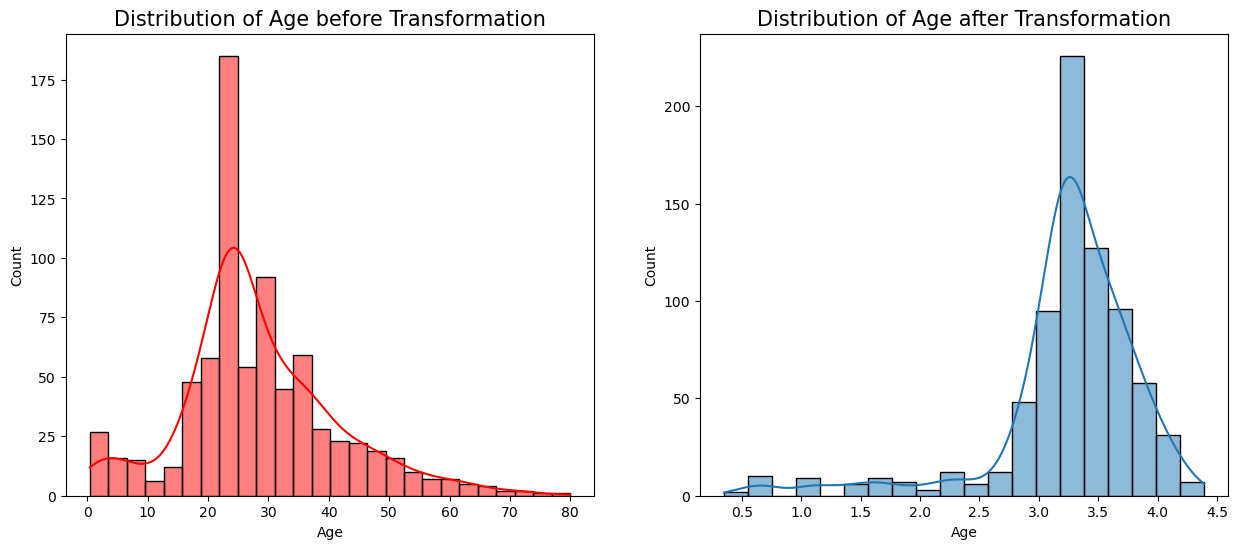

Skewness was 0.58832 before & is -2.0532 after Log transformation.
 Categorical Features SibSp 
 Categorical Features Parch 


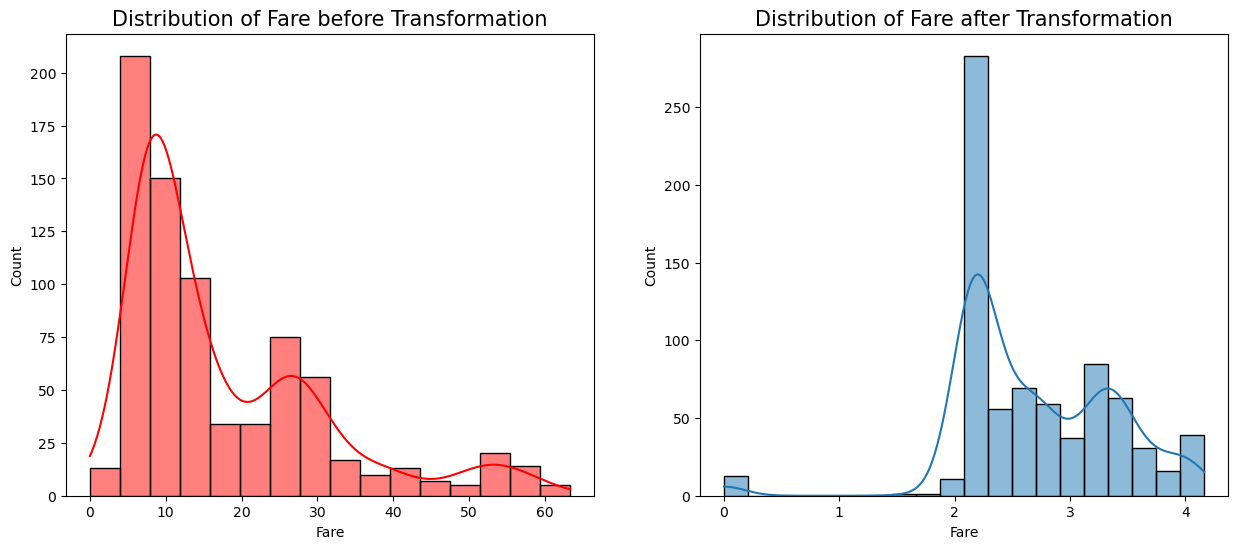

Skewness was 1.41983 before & is -0.44363 after Log transformation.


In [614]:
df_train=Skewness_log_square(df_train,10)

In [615]:
df_train.skew()

C:\Users\ACER\AppData\Local\Temp\ipykernel_18028\1035533876.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.skew()


PassengerId    0.008520
Survived       0.700169
Pclass        -1.025325
Age           -2.053197
SibSp          2.854316
Parch          3.195721
Fare          -0.443633
dtype: float64

In [616]:
df_train.drop(["Name","PassengerId"], axis=1, inplace=True)

In [617]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,3.135494,1,0,A/5 21171,2.110213,S
1,1,3,female,3.295837,0,0,STON/O2. 3101282,2.188856,S
2,1,1,female,3.583519,1,0,113803,3.990834,S
3,0,3,male,3.583519,0,0,373450,2.202765,S
4,0,3,male,3.218876,0,0,330877,2.246893,Q
...,...,...,...,...,...,...,...,...,...
759,0,2,male,3.332205,0,0,211536,2.639057,S
760,1,1,female,2.995732,0,0,112053,3.433987,S
761,0,3,female,3.218876,1,2,W./C. 6607,3.196630,S
762,1,1,male,3.295837,0,0,111369,3.433987,C


In [618]:
# Encoding Categorical Columns
#OneHotEncoder ===> 0,1 = num of uniques*num_columns

In [619]:
from sklearn.preprocessing import OneHotEncoder

In [620]:
info_cat=df_train[["Ticket"]]
info_cat.head(10)

,Ticket
0,A/5 21171
1,STON/O2. 3101282
2,113803
3,373450
4,330877
5,17463
6,349909
7,347742
8,237736
9,PP 9549


In [621]:
info_cat["Ticket"].nunique()

631

In [622]:
#converting to numerical data using OneHotEncoder
ohe=OneHotEncoder()
info_cat_1hot=ohe.fit_transform(info_cat)
info_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [623]:
ohe.get_feature_names_out()

array(['Ticket_110465', 'Ticket_110564', 'Ticket_111240', 'Ticket_111320',
       'Ticket_111361', 'Ticket_111369', 'Ticket_111426', 'Ticket_111427',
       'Ticket_111428', 'Ticket_112050', 'Ticket_112052', 'Ticket_112053',
       'Ticket_112058', 'Ticket_112059', 'Ticket_112277', 'Ticket_112379',
       'Ticket_113028', 'Ticket_113043', 'Ticket_113050', 'Ticket_113051',
       'Ticket_113055', 'Ticket_113056', 'Ticket_113059', 'Ticket_113501',
       'Ticket_113505', 'Ticket_113509', 'Ticket_113510', 'Ticket_113514',
       'Ticket_113767', 'Ticket_113773', 'Ticket_113783', 'Ticket_113784',
       'Ticket_113786', 'Ticket_113787', 'Ticket_113788', 'Ticket_113789',
       'Ticket_113792', 'Ticket_113794', 'Ticket_113796', 'Ticket_113798',
       'Ticket_113800', 'Ticket_113803', 'Ticket_113804', 'Ticket_113806',
       'Ticket_113807', 'Ticket_11668', 'Ticket_11751', 'Ticket_11752',
       'Ticket_11753', 'Ticket_11755', 'Ticket_11765', 'Ticket_11769',
       'Ticket_11771', 'Ticket_1

In [624]:
info_cat_1hot_df = pd.DataFrame(info_cat_1hot.toarray(), columns=ohe.get_feature_names_out())

In [625]:
info_cat_1hot_df

,Ticket_110465,Ticket_110564,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,Ticket_111427,Ticket_111428,Ticket_112050,...,Ticket_STON/O2. 3101283,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
762,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [626]:
df_train_copy=df_train.copy()

In [627]:
# creating the Series
series1 = pd.Series([1, 2, 3])
print('series1:', series1)
series2 = pd.Series(['A', 'B', 'C'])
print('series2:', series2)



series1: 0    1
1    2
2    3
dtype: int64
series2: 0    A
1    B
2    C
dtype: object


In [628]:
# concatenating = merge
print('After concatenating:')
pd.concat([series1, series2],axis=1)

After concatenating:


,0,1
0,1,A
1,2,B
2,3,C


In [629]:
df_train_ohe = pd.concat([info_cat_1hot_df, df_train], axis=1)
df_train_ohe

,Ticket_110465,Ticket_110564,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,Ticket_111427,Ticket_111428,Ticket_112050,...,Ticket_W/C 14208,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,3,male,3.135494,1,0,A/5 21171,2.110213,S
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,3,female,3.295837,0,0,STON/O2. 3101282,2.188856,S
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,1,female,3.583519,1,0,113803,3.990834,S
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,3,male,3.583519,0,0,373450,2.202765,S
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,3,male,3.218876,0,0,330877,2.246893,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,2,male,3.332205,0,0,211536,2.639057,S
760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,1,female,2.995732,0,0,112053,3.433987,S
761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,3,female,3.218876,1,2,W./C. 6607,3.196630,S
762,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1,1,male,3.295837,0,0,111369,3.433987,C


In [630]:
column = df_train_ohe.pop("Ticket_110465")
df_train_ohe.insert(634, "Ticket_110465", column)

In [631]:
df_train_ohe

,Ticket_110564,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,Ticket_111427,Ticket_111428,Ticket_112050,Ticket_112052,...,Survived,Pclass,Sex,Age,Ticket_110465,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,male,3.135494,0.0,1,0,A/5 21171,2.110213,S
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,female,3.295837,0.0,0,0,STON/O2. 3101282,2.188856,S
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,female,3.583519,0.0,1,0,113803,3.990834,S
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,male,3.583519,0.0,0,0,373450,2.202765,S
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,male,3.218876,0.0,0,0,330877,2.246893,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,male,3.332205,0.0,0,0,211536,2.639057,S
760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,female,2.995732,0.0,0,0,112053,3.433987,S
761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,female,3.218876,0.0,1,2,W./C. 6607,3.196630,S
762,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,male,3.295837,0.0,0,0,111369,3.433987,C


In [632]:
from sklearn.preprocessing import OrdinalEncoder
Rank=["male","female"]
ordinal_encoder = OrdinalEncoder(categories=[Rank])
df_train['Sex'] = ordinal_encoder.fit_transform(df_train[['Sex']])

df_train_get_dummies = pd.get_dummies(df_train["Embarked"],drop_first=True)
df = pd.concat([df_train, df_train_get_dummies], axis=1)
df.drop(["Embarked","Ticket"],axis=1,inplace=True)

In [633]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0.0,3.135494,1,0,2.110213,0,1
1,1,3,1.0,3.295837,0,0,2.188856,0,1
2,1,1,1.0,3.583519,1,0,3.990834,0,1
3,0,3,0.0,3.583519,0,0,2.202765,0,1
4,0,3,0.0,3.218876,0,0,2.246893,1,0
...,...,...,...,...,...,...,...,...,...
759,0,2,0.0,3.332205,0,0,2.639057,0,1
760,1,1,1.0,2.995732,0,0,3.433987,0,1
761,0,3,1.0,3.218876,1,2,3.196630,0,1
762,1,1,0.0,3.295837,0,0,3.433987,0,0


In [634]:
from sklearn.model_selection import train_test_split
X = df.drop(['Survived'],axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [635]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
608,1,0.0,3.891820,1,0,3.970292,0,1
631,3,0.0,3.218876,0,0,2.185579,0,1
209,2,0.0,4.094345,0,0,2.674149,0,1
412,3,0.0,3.135494,0,0,2.142510,0,1
453,3,0.0,3.688879,0,0,2.188856,0,1
...,...,...,...,...,...,...,...,...
71,3,1.0,3.433987,0,0,2.600836,0,1
106,3,0.0,4.269697,0,0,2.169054,1,0
270,2,0.0,3.433987,1,0,3.218876,0,0
435,3,0.0,3.367296,0,0,3.158064,0,1


# Feature Scaling

In [636]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
X_train_scale=rob_scaler.fit_transform(X_train)
X_test_scale=rob_scaler.transform(X_test)

In [637]:
X_test_scale

array([[-1.        ,  0.        ,  0.28653858, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  0.        ,  0.6535118 , ..., -0.00807801,
         0.        , -1.        ],
       [ 0.        ,  0.        , -0.52125301, ..., -0.2299281 ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  1.        ,  0.7088246 , ..., -0.25163824,
         0.        ,  0.        ],
       [-2.        ,  0.        ,  0.7088246 , ...,  0.85066889,
         0.        ,  0.        ],
       [ 0.        ,  1.        , -2.06011044, ...,  0.65280729,
         0.        ,  0.        ]])

In [638]:
df_test=pd.read_csv("test (1).csv")

In [639]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
